In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,norm 
# EDA is a continuous process

# Importing Dataset

In [2]:
df=pd.read_csv('HR_Analytics.csv')
df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


In [3]:
# Finding Dataset rows,colums
df.shape

(1470, 35)

In [4]:
# Finding info of dataset
df.info

<bound method DataFrame.info of       Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Educati

In [5]:
# Describing the dataset
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [8]:
# Importing package which finds out the missing nos


In [9]:
!pip install missingno
import missingno

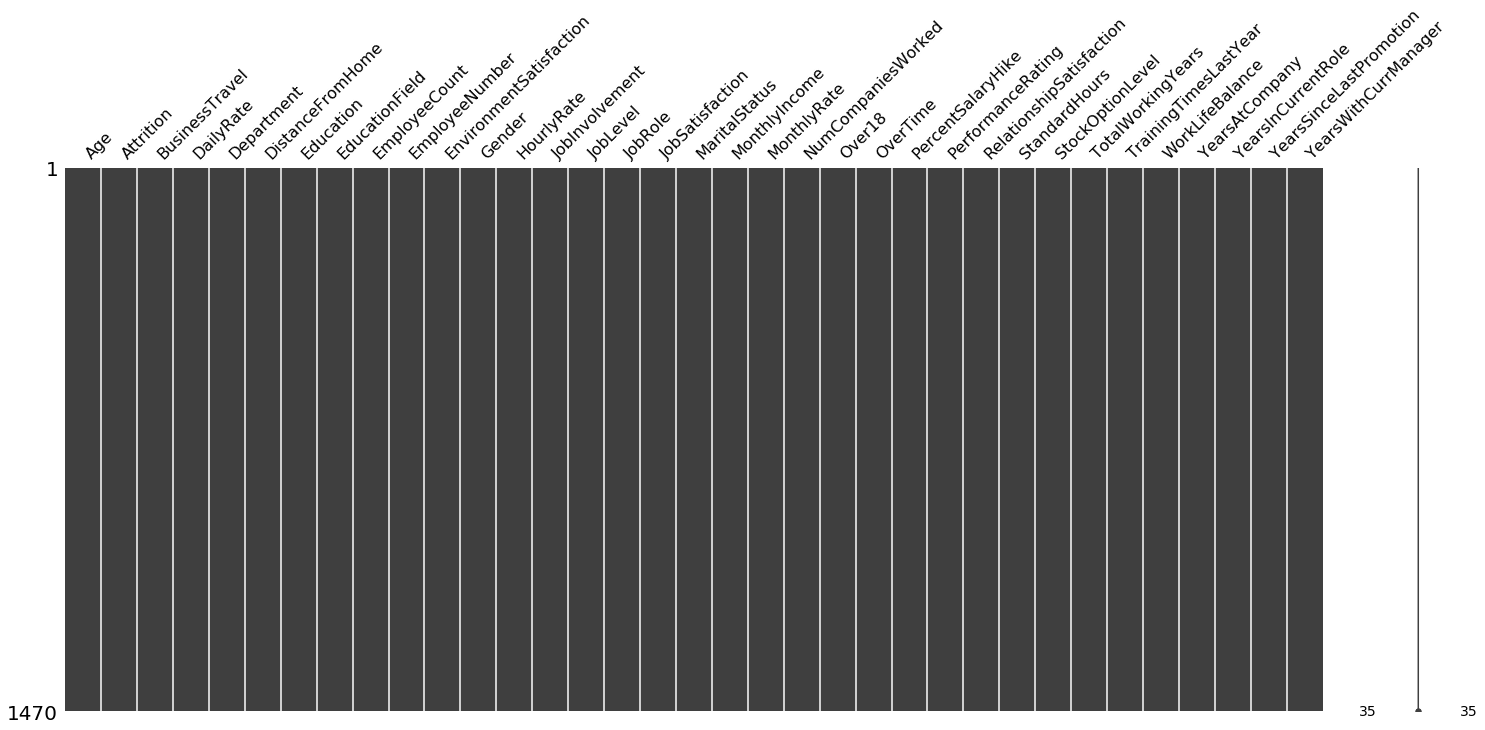

In [10]:
# Plotting graph to check the null values
missingno.matrix(df)

In [11]:
# Checking datatypes of the columns
df.select_dtypes(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [12]:
df.select_dtypes(include='number')

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,1,2062,4,42,2,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,1,2064,2,87,4,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,1,2065,4,63,2,...,4,80,0,17,3,2,9,6,0,8


In [13]:
# For alphanum
df.select_dtypes(include=['object','number']).head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


In [14]:
df.select_dtypes(include=object).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [15]:
df.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [16]:
q1=df['Age'].quantile(0.25)
q1

30.0

In [17]:
q3=df['Age'].quantile(0.75)
q3

43.0

In [18]:
iqr=q3-q1
uppl=q3+(1.5*iqr)
lowl=q1-(1.5*iqr)
print(uppl)
print(lowl)

62.5
10.5


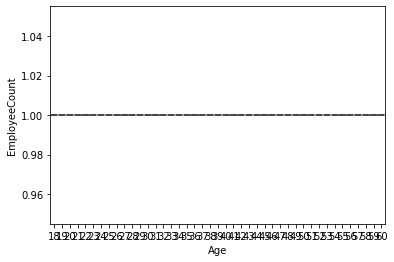

In [19]:
sns.boxplot(x='Age',y='EmployeeCount', data=df)

In [20]:
fig, ax = plt.subplots(len(col_names), figsize=(16,15))

for i, col_val in enumerate(col_names):
        
    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.show()

NameError: name 'col_names' is not defined

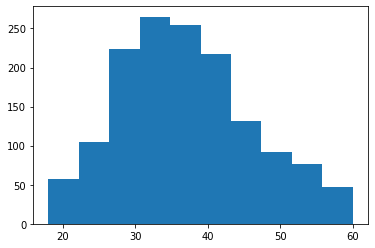

In [21]:
plt.hist(df['Age'])
plt.show()

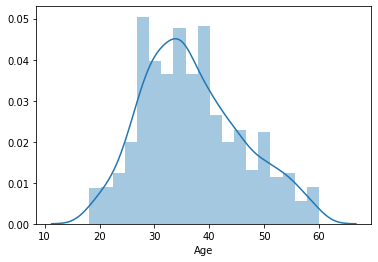

In [22]:
sns.distplot(df.Age, hist=True,kde=True)

In [23]:
#To find skewness for age
skew=df['Age'].skew()
print(skew)


0.4132863018563338


In [24]:
# Since the skewness is positive, the graph would be right skewed

In [25]:
#To find kurtosis for age
kurt=df['Age'].kurtosis()
print(kurt)


-0.4041451371872906


# Here the kurtosis value is -0.4 which is less than 3. Hence we can infer that the data is towards platykurtic nature.The kurtosis of any univariate normal distribution is 3. Distributions with kurtosis greater than 3 are said to be leptokurtic

In [26]:
# Analysis for categorical columns

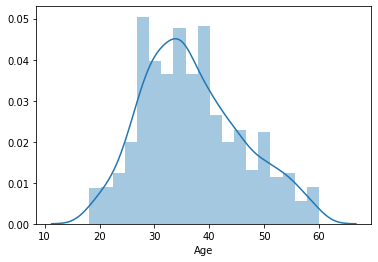

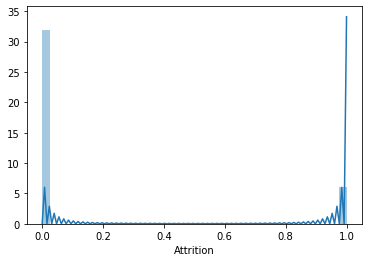

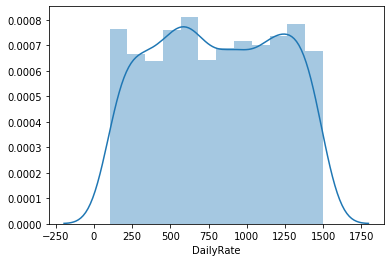

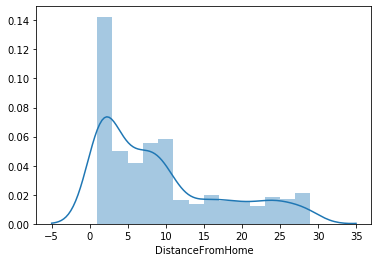

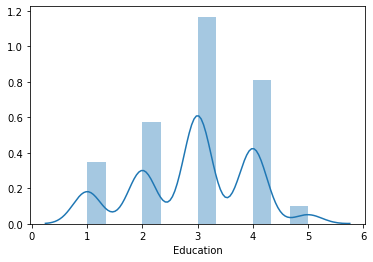

C:\Users\satyam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\satyam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


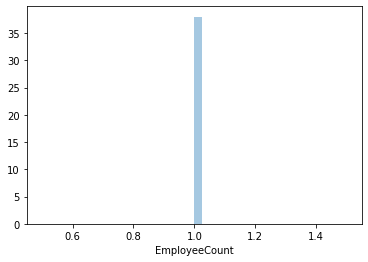

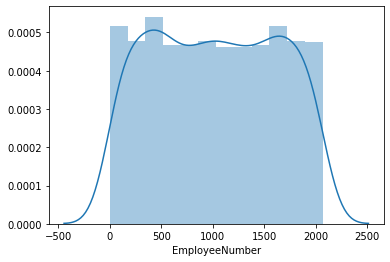

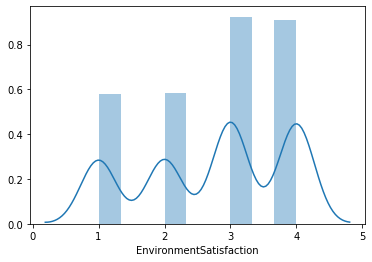

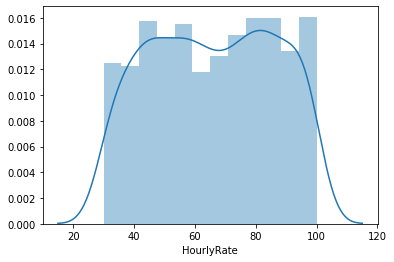

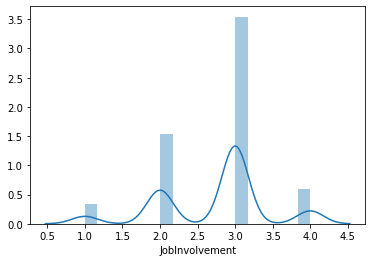

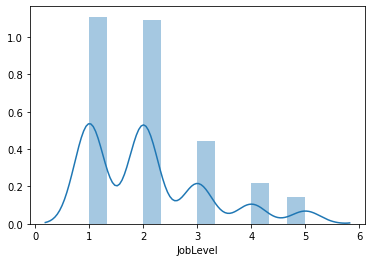

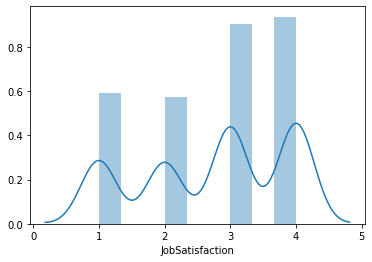

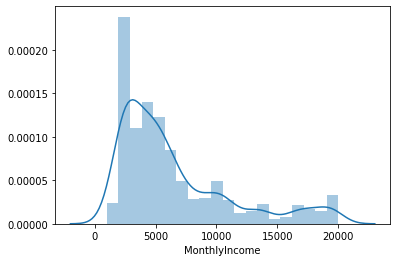

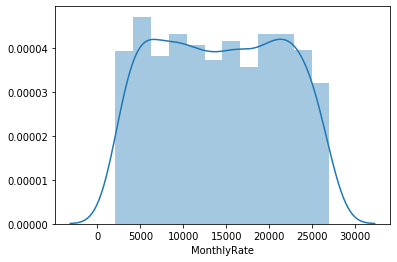

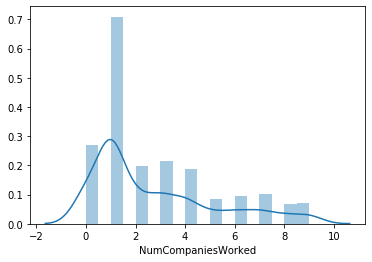

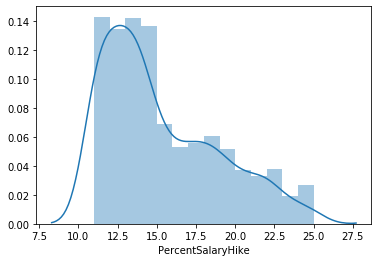

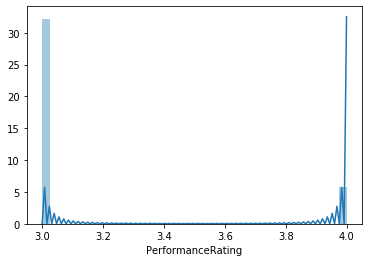

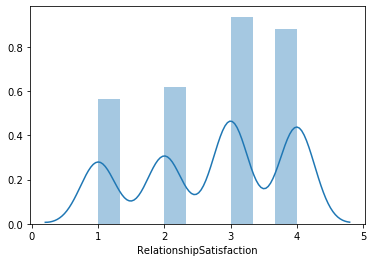

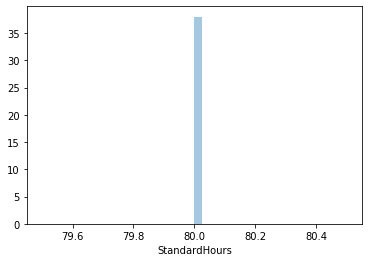

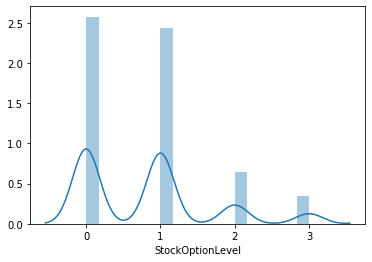

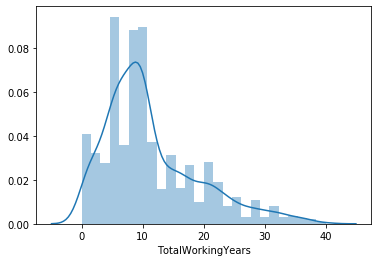

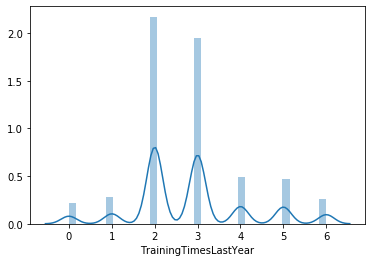

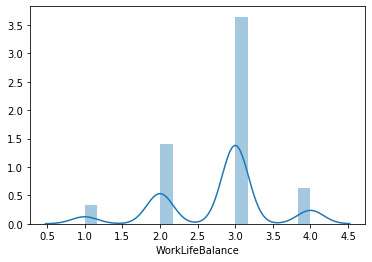

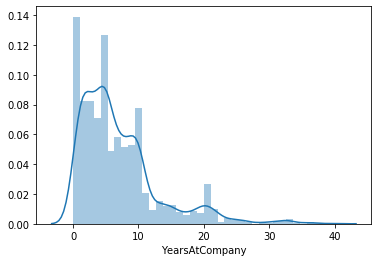

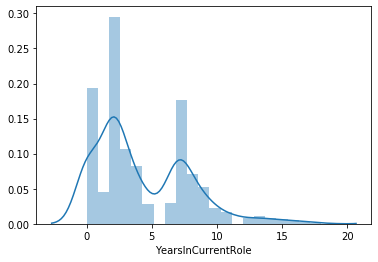

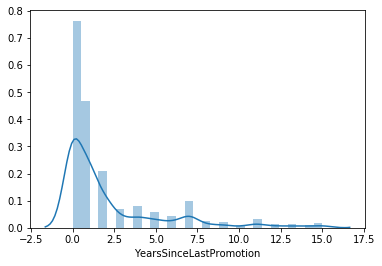

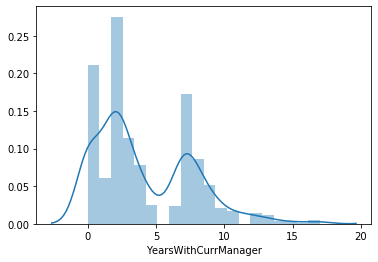

In [27]:
for i in df.select_dtypes(exclude='object').columns:
    sns.distplot(df[i])
    plt.show()
    

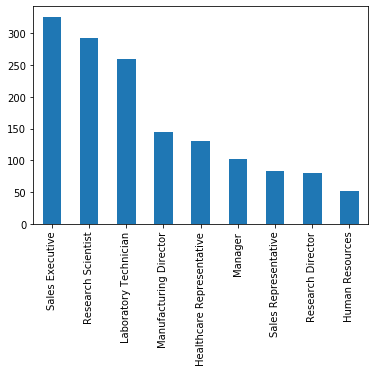

In [28]:
df['JobRole'].value_counts().plot(kind='bar')

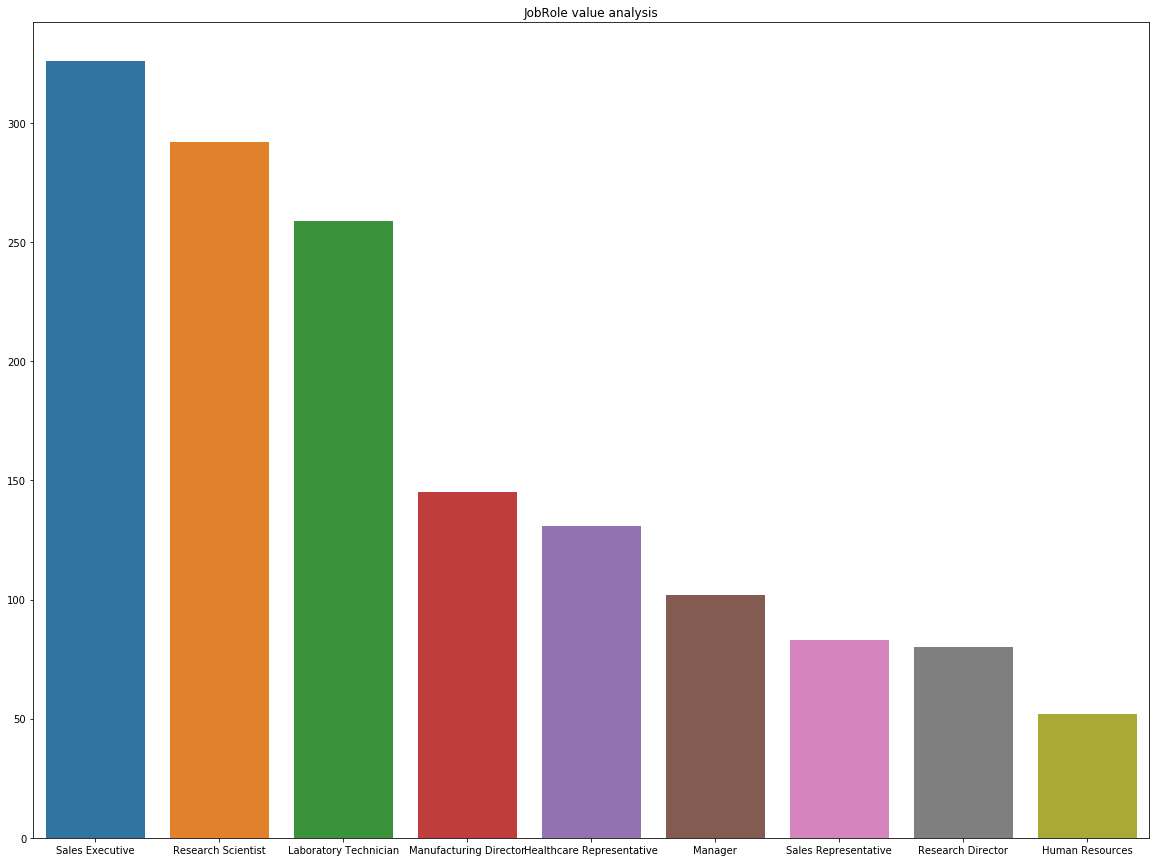

In [29]:
plt.figure(figsize=(20,15))
x=df['JobRole'].value_counts().index
y=df['JobRole'].value_counts().values
sns.barplot(x,y)
plt.title('JobRole value analysis')
plt.show()

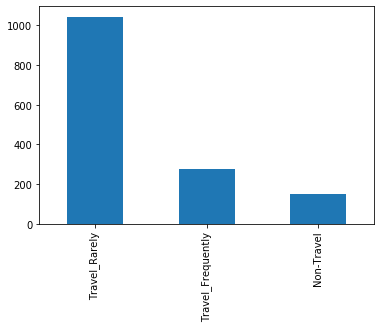

In [30]:
df.BusinessTravel.value_counts().plot(kind='bar')

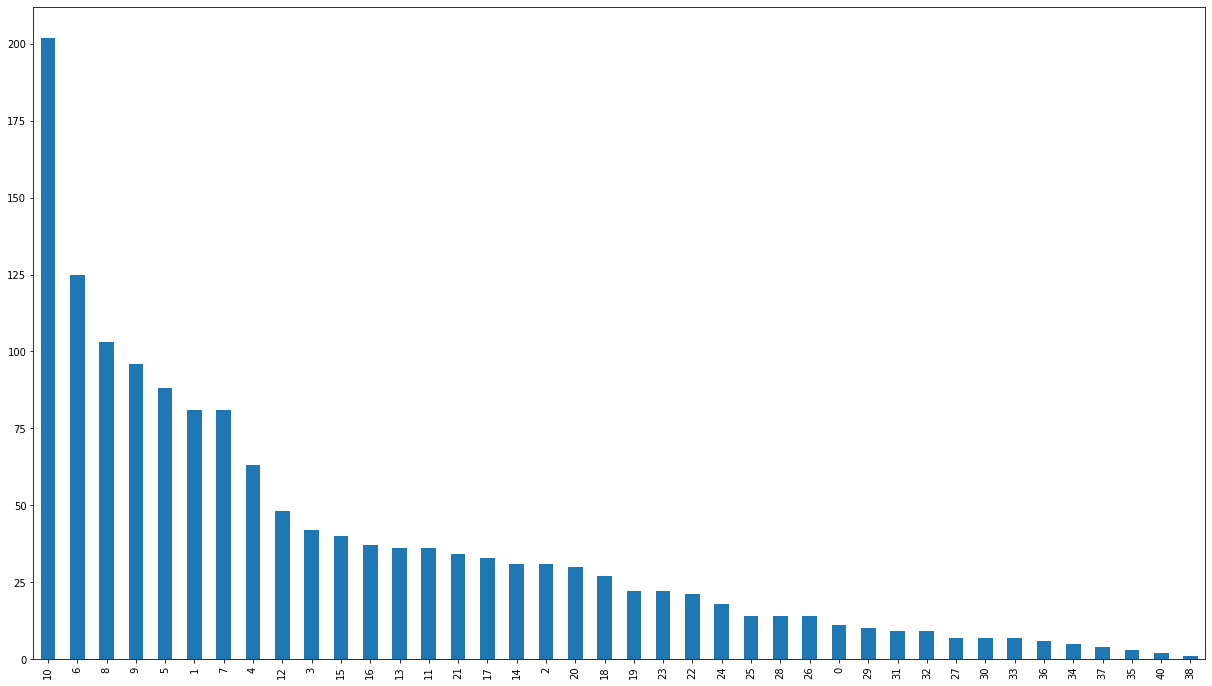

In [31]:
plt.figure(figsize=(21,12))
df.TotalWorkingYears.value_counts().plot(kind='bar')
plt.show()

In [32]:
# To find skew and kurtosis for all the numeric columns

In [33]:
for i in df.select_dtypes(exclude='object').columns:
    print(i, ' ', df[i].skew())
    print(i, ' ', df[i].kurtosis())
    print()

Age   0.4132863018563338
Age   -0.4041451371872906

Attrition   1.8443661240010911
Attrition   1.4035942007629205

DailyRate   -0.003518568352325854
DailyRate   -1.2038228076234574

DistanceFromHome   0.9581179956568269
DistanceFromHome   -0.22483340490405102

Education   -0.2896810819684331
Education   -0.5591149664143074

EmployeeCount   0
EmployeeCount   0

EmployeeNumber   0.016574019580105036
EmployeeNumber   -1.2231789059146994

EnvironmentSatisfaction   -0.32165444773937907
EnvironmentSatisfaction   -1.2025205217966843

HourlyRate   -0.03231095290044942
HourlyRate   -1.1963984562565886

JobInvolvement   -0.4984193640419493
JobInvolvement   0.27099876649436405

JobLevel   1.0254012829518246
JobLevel   0.39915205539119025

JobSatisfaction   -0.3296719586636647
JobSatisfaction   -1.2221925684964252

MonthlyIncome   1.3698166808390662
MonthlyIncome   1.005232691449859

MonthlyRate   0.018577807891132458
MonthlyRate   -1.2149560995878737

NumCompaniesWorked   1.026471111968205
NumCom

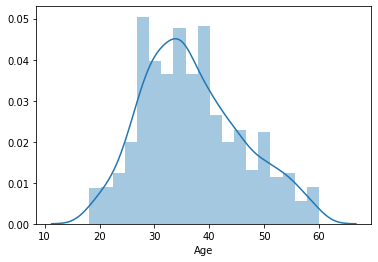

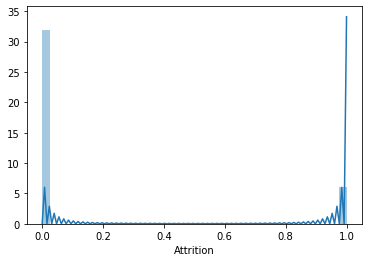

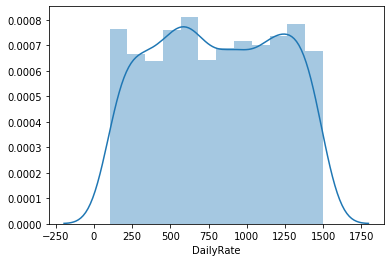

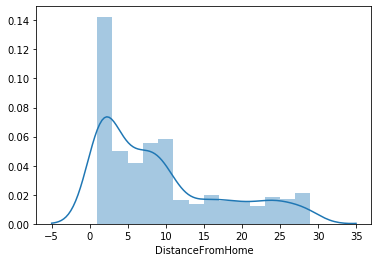

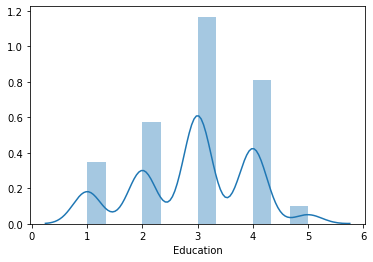

C:\Users\satyam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\satyam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


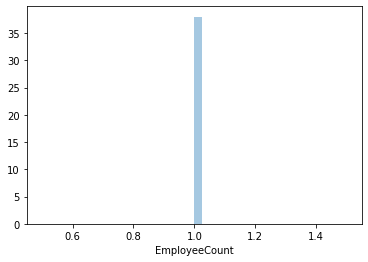

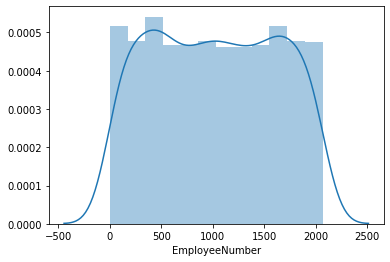

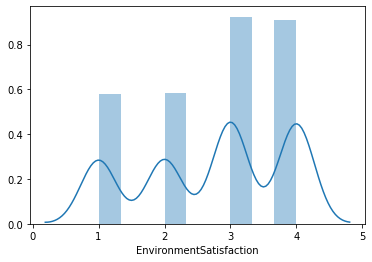

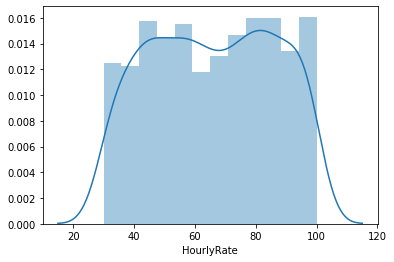

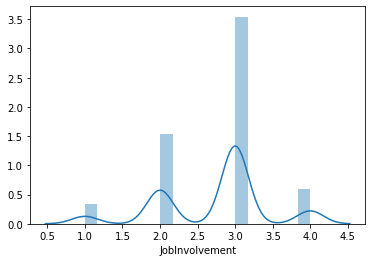

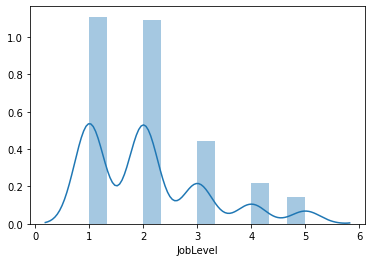

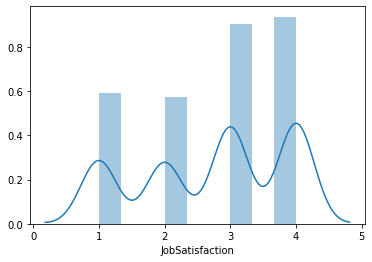

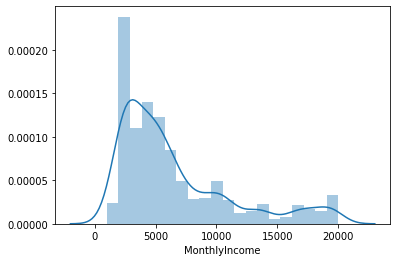

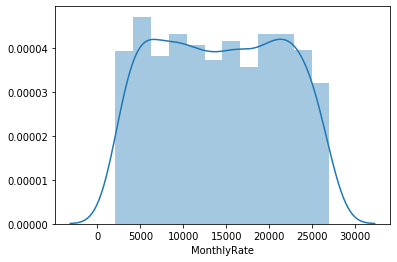

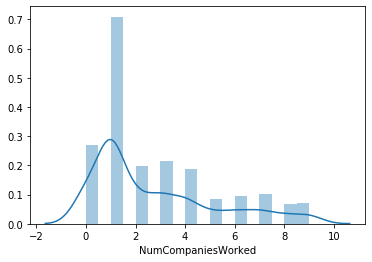

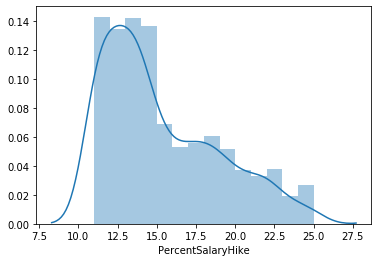

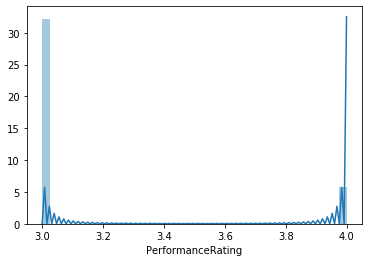

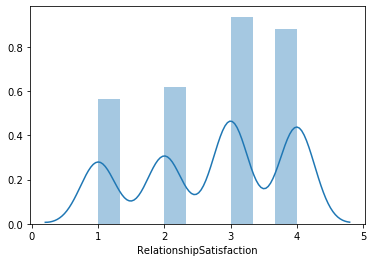

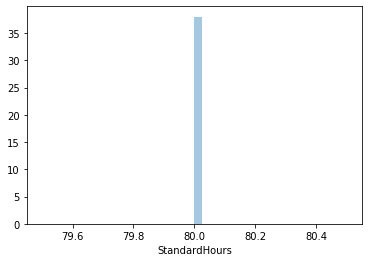

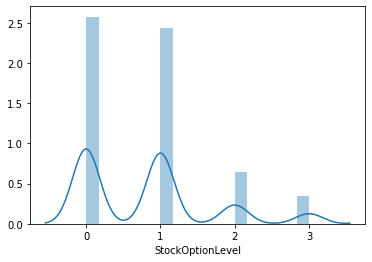

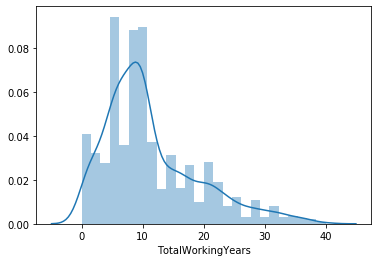

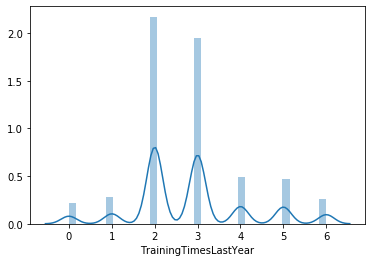

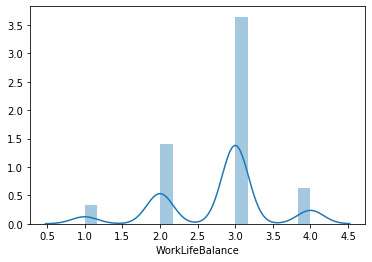

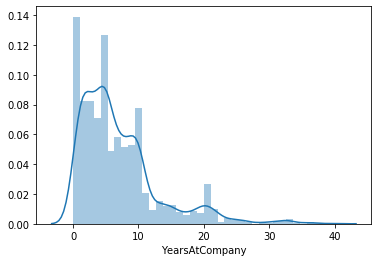

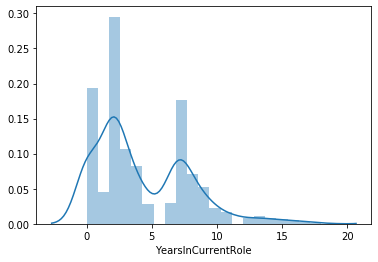

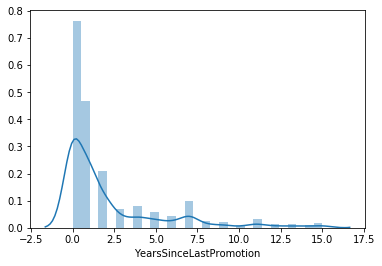

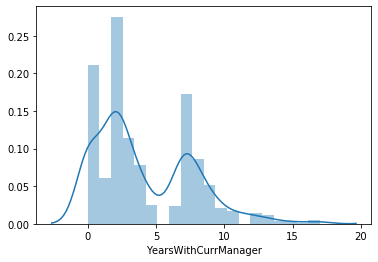

In [34]:
for i in df.select_dtypes(include='number').columns:
    sns.distplot(df[i])
    plt.show()

In [35]:
# For determining univariate analysis of categorical columns

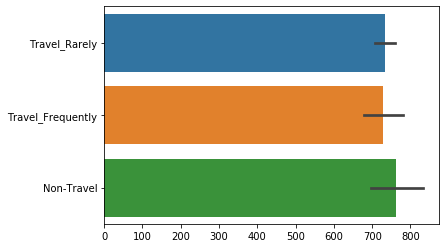

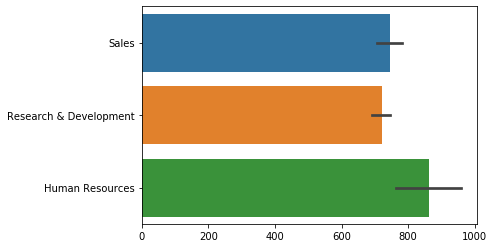

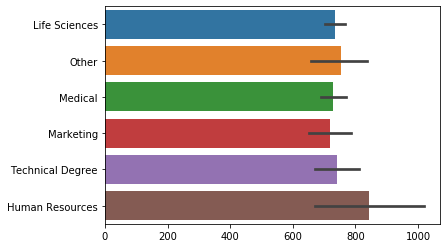

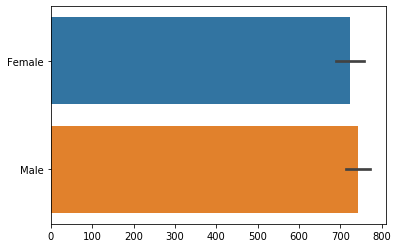

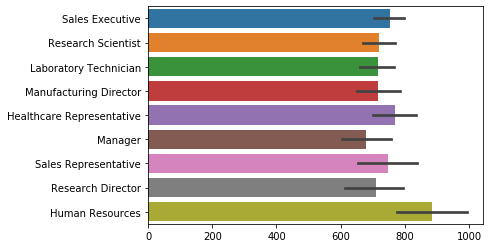

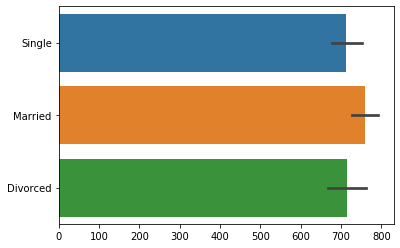

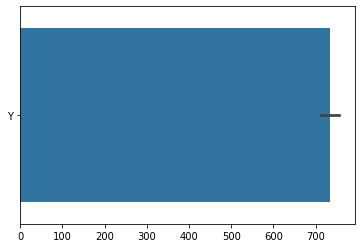

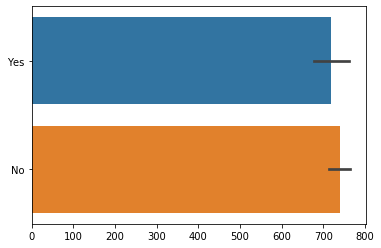

In [36]:
for i in df.select_dtypes(include='object').columns:
    sns.barplot(x=df[i].index,y=df[i].values)
    plt.show()

# Bivariate Analysis

In [37]:
from sklearn.preprocessing import LabelEncoder

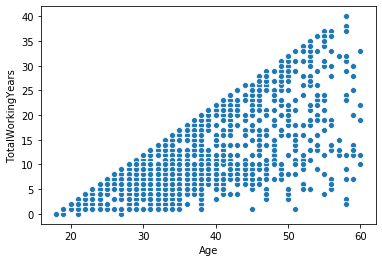

In [38]:
#1. Numeric vs Numeric
sns.scatterplot(x='Age', y='TotalWorkingYears', data=df)

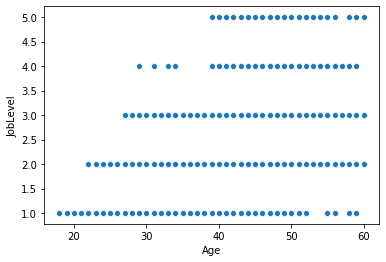

In [39]:
sns.scatterplot(x='Age', y='JobLevel', data=df)

In [40]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [41]:
df['Married_encoded']=df['MaritalStatus'].map({'Married':0,'Single':1,'Divorced':2})
df['Married_encoded'].head(15)

0     1
1     0
2     1
3     0
4     0
5     1
6     0
7     2
8     1
9     0
10    0
11    1
12    2
13    2
14    1
Name: Married_encoded, dtype: int64

In [42]:
df[['MaritalStatus','Married_encoded']].head()

,MaritalStatus,Married_encoded
0,Single,1
1,Married,0
2,Single,1
3,Married,0
4,Married,0


In [43]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Married_encoded
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [44]:
# Label Encoder

In [45]:
# First check for value_counts for the categorical data type:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [46]:
df['Married_Encoded']= df['MaritalStatus'].map({'Married':0,'Single':1,'Divorced':2})
df['Married_Encoded'].head()

0    1
1    0
2    1
3    0
4    0
Name: Married_Encoded, dtype: int64

In [47]:
# Checking the above code if it was encoded:
df[['Married_Encoded','MaritalStatus']].head()

,Married_Encoded,MaritalStatus
0,1,Single
1,0,Married
2,1,Single
3,0,Married
4,0,Married


In [48]:
# Importing the OneHotEncoder Libraray :
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(df['MaritalStatus'])
df['married_encoded']=integer_encoded
df[['MaritalStatus','married_encoded']].head(7)

,MaritalStatus,married_encoded
0,Single,2
1,Married,1
2,Single,2
3,Married,1
4,Married,1
5,Single,2
6,Married,1


In [49]:
# Importing the OneHotEncoder Libraray :
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded=integer_encoded.reshape(len (integer_encoded),1)
onehot_encoded=
print(onehot_encoded)

SyntaxError: invalid syntax (<ipython-input-49-873bb2ea0031>, line 6)

In [50]:
pd.get_dummies(df['MaritalStatus'])

,Divorced,Married,Single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
1465,0,1,0
1466,0,1,0
1467,0,1,0
1468,0,1,0


In [51]:
label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(df['MaritalStatus'])
df['married_encoded']=integer_encoded
df[['MaritalStatus','married_encoded']].head(7)

,MaritalStatus,married_encoded
0,Single,2
1,Married,1
2,Single,2
3,Married,1
4,Married,1
5,Single,2
6,Married,1


In [ ]:
one_hotencoder=onehotencoder


In [53]:
Q1=df['YearsAtCompany'].quantile(0.25)
Q3=df['YearsAtCompany'].quantile(0.75)
IQR=Q3-Q1
IQR

6.0

In [54]:
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print(lower)
print(upper)

-6.0
18.0


In [55]:
df[df['YearsAtCompany']<lower]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Married_encoded,Married_Encoded,married_encoded


In [56]:
df[df['YearsAtCompany']>upper]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Married_encoded,Married_Encoded,married_encoded
18,53,0,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,31,3,3,25,8,3,7,0,0,1
28,44,0,Travel_Rarely,477,Research & Development,7,4,Medical,1,36,...,24,4,3,22,6,5,17,0,0,1
45,41,1,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,...,23,0,3,22,15,15,8,0,0,1
62,50,0,Travel_Rarely,989,Research & Development,7,2,Medical,1,80,...,29,2,2,27,3,13,8,2,2,0
63,59,0,Travel_Rarely,1435,Sales,25,3,Life Sciences,1,81,...,28,3,2,21,16,7,9,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,39,0,Travel_Rarely,119,Sales,15,4,Marketing,1,1975,...,21,3,3,20,8,11,10,1,1,2
1404,42,0,Non-Travel,335,Research & Development,23,2,Life Sciences,1,1976,...,20,2,3,20,9,3,7,1,1,2
1443,42,0,Travel_Rarely,300,Research & Development,2,3,Life Sciences,1,2031,...,24,2,2,22,6,4,14,0,0,1
1445,41,0,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,...,21,3,3,20,7,0,10,0,0,1


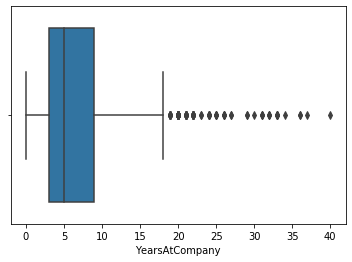

In [57]:
df[(df["YearsAtCompany"]<lower)| (df['YearsAtCompany']>upper)]['YearsAtCompany']
sns.boxplot('YearsAtCompany', data=df)

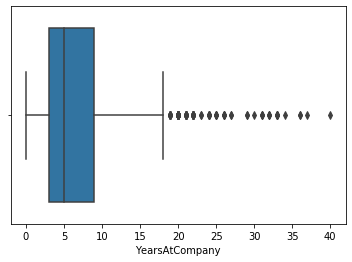

In [58]:
sns.boxplot('YearsAtCompany', data=df)

In [59]:
df[(df["YearsAtCompany"]>lower)| (df['YearsAtCompany']<upper)]['YearsAtCompany']


0        6
1       10
2        0
3        8
4        2
        ..
1465     5
1466     7
1467     6
1468     9
1469     4
Name: YearsAtCompany, Length: 1470, dtype: int64

In [60]:
df[(df["YearsAtCompany"]<lower) & (df['YearsAtCompany']>upper)]['YearsAtCompany']


Series([], Name: YearsAtCompany, dtype: int64)

In [61]:
# Finding TotalWorkingYears outliers

In [62]:
Q1=df['TotalWorkingYears'].quantile(0.25)
Q3=df['TotalWorkingYears'].quantile(0.75)
IQR=Q3-Q1
IQR
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print(lower)
print(upper)

-7.5
28.5


0        8
1       10
2        7
3        8
4        6
        ..
1465    17
1466     9
1467     6
1468    17
1469     6
Name: TotalWorkingYears, Length: 1470, dtype: int64


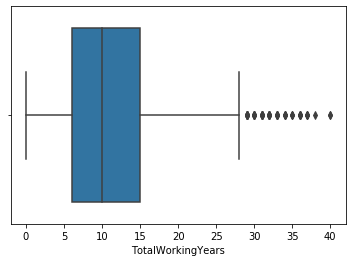

In [63]:
data=df[(df["TotalWorkingYears"]>lower)| (df['TotalWorkingYears']<upper)]['TotalWorkingYears']
print(data)
sns.boxplot('TotalWorkingYears', data=df)

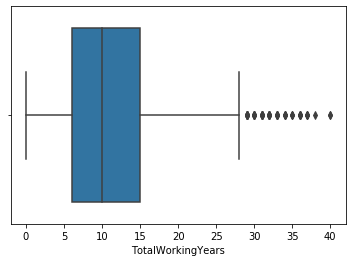

In [64]:
sns.boxplot('TotalWorkingYears', data=df)

In [68]:
df.shape

(1470, 38)

In [ ]:
# Splitting into train and test

In [69]:
y=df['HourlyRate']

In [70]:
x=df.drop(['HourlyRate'], axis=1)
x.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Married_encoded,Married_Encoded,married_encoded
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,1,2
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,0,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,1,2


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

In [73]:
X_train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Married_encoded,Married_Encoded,married_encoded
139,30,0,Travel_Rarely,1240,Human Resources,9,3,Human Resources,1,184,...,12,2,1,11,9,4,7,0,0,1
48,46,0,Travel_Frequently,1211,Sales,5,4,Marketing,1,62,...,14,4,3,9,6,0,8,1,1,2
681,38,0,Travel_Rarely,1333,Research & Development,1,3,Technical Degree,1,950,...,15,3,3,15,12,5,11,0,0,1
1281,35,1,Travel_Rarely,303,Sales,27,3,Life Sciences,1,1797,...,10,2,3,10,7,7,7,1,1,2
856,20,0,Travel_Rarely,805,Research & Development,3,3,Life Sciences,1,1198,...,2,2,2,2,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,29,0,Travel_Rarely,1210,Sales,2,3,Medical,1,366,...,10,2,3,0,0,0,0,0,0,1
460,26,0,Travel_Rarely,775,Sales,29,2,Medical,1,618,...,8,5,3,0,0,0,0,2,2,0
618,25,0,Travel_Rarely,180,Research & Development,2,1,Medical,1,854,...,6,3,2,4,3,0,1,1,1,2
535,41,0,Travel_Rarely,427,Human Resources,10,4,Human Resources,1,731,...,23,2,2,21,6,12,6,2,2,0


In [74]:
X_test

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Married_encoded,Married_Encoded,married_encoded
1396,53,1,Travel_Rarely,1168,Sales,24,4,Life Sciences,1,1968,...,15,2,2,2,2,2,2,1,1,2
1207,55,0,Travel_Rarely,1441,Research & Development,22,3,Technical Degree,1,1694,...,8,1,3,4,2,1,2,2,2,0
226,37,0,Travel_Frequently,319,Sales,4,4,Marketing,1,311,...,13,2,3,9,8,5,8,2,2,0
475,26,0,Travel_Rarely,703,Sales,28,2,Marketing,1,641,...,6,5,4,5,3,1,4,0,0,1
938,58,0,Travel_Rarely,848,Research & Development,23,4,Life Sciences,1,1308,...,2,3,3,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,...,16,3,2,14,8,6,9,2,2,0
1014,31,0,Travel_Rarely,182,Research & Development,8,5,Life Sciences,1,1430,...,9,3,4,3,2,1,0,1,1,2
1361,26,0,Travel_Frequently,1096,Research & Development,6,3,Other,1,1918,...,8,3,3,7,7,7,7,0,0,1
671,34,0,Travel_Rarely,546,Research & Development,10,3,Life Sciences,1,934,...,1,3,3,1,0,1,0,2,2,0


In [75]:
y_train

139     48
48      98
681     80
1281    84
856     87
        ..
265     78
460     45
618     65
535     73
23      96
Name: HourlyRate, Length: 1176, dtype: int64

In [76]:
y_test

1396    66
1207    94
226     41
475     66
938     88
        ..
1055    71
1014    93
1361    61
671     83
305     47
Name: HourlyRate, Length: 294, dtype: int64

In [77]:
df.shape

(1470, 38)

In [79]:
sns.heatmap

<function seaborn.matrix.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>